In [67]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
style.use('ggplot')
%matplotlib inline
style.use('seaborn-poster')

plt.rc('figure', figsize=(10, 6))

In [68]:
pd

<module 'pandas' from 'C:\\Users\\GOLDSTEIN VENTURES\\Anaconda3\\lib\\site-packages\\pandas\\__init__.py'>

In [69]:
df = pd.read_csv('data.csv')
df.sample(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1163,2014-05-22 00:00:00,503000.0,2.0,1.75,2860,59612,1.0,1,4,3,1510,1350,1948,2003,4338 SW 307th St,Federal Way,WA 98023,USA
4405,2014-05-20 00:00:00,0.0,4.0,3.75,3300,4545,1.5,0,4,3,2600,700,1926,1999,3665 50th Ave NE,Seattle,WA 98105,USA
3277,2014-06-25 00:00:00,365500.0,3.0,2.00,1410,9600,1.0,0,0,4,1410,0,1983,0,18120 145th Pl NE,Woodinville,WA 98072,USA
4425,2014-05-28 00:00:00,87500.0,2.0,1.00,780,6685,1.0,0,0,4,780,0,1948,0,311 L St SE,Auburn,WA 98002,USA


In [70]:
df.shape

(4600, 18)

In [71]:
df['date'] = pd.to_datetime(df['date'])

In [72]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [73]:
df.isna().mean() * 100

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [74]:
df['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [75]:
df['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [76]:
# The following are the variables I decided to drop and why.

# 1. Waterfroot - because more than 99% of the values were zeros and therefore wouldn't have any significant effect on the model.
# 2. View - here about 90% of the values were zeros
# 3. Country - USA is the country under study hence there was no need including it 
# 4. Statezip - Washington was the only state under study and we had sufficient info(street,city) to locate the houses
# 5. street - the street address doesnt have any effect on the price as the city. Hence the city is preferred.

In [77]:
house = df[[ 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'price', 'yr_renovated', 'city']]
house.head(4)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,price,yr_renovated,city
0,2014-05-02,3.0,1.50,1340,7912,1.5,3,1340,0,1955,313000.0,2005,Shoreline
1,2014-05-02,5.0,2.50,3650,9050,2.0,5,3370,280,1921,2384000.0,0,Seattle
2,2014-05-02,3.0,2.00,1930,11947,1.0,4,1930,0,1966,342000.0,0,Kent
3,2014-05-02,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,420000.0,0,Bellevue


In [78]:
house.groupby('city').mean().head(6)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,price,yr_renovated
city,,,,,,,,,,,
Algona,3.200000,1.900000,1608.600000,11494.200000,1.400000,3.200000,1608.600000,0.000000,1983.200000,207288.000000,800.400000
Auburn,3.420455,2.092330,2019.579545,24999.221591,1.448864,3.409091,1862.250000,157.329545,1980.795455,299340.442766,725.761364
Beaux Arts Village,3.000000,1.750000,1490.000000,9800.000000,1.000000,4.000000,1140.000000,350.000000,1947.000000,745000.000000,1988.000000
Bellevue,3.804196,2.453671,2694.527972,13741.178322,1.398601,3.590909,2182.604895,511.923077,1973.814685,847180.662995,823.517483
Black Diamond,3.222222,1.750000,1863.333333,25006.666667,1.388889,3.222222,1807.777778,55.555556,1978.666667,339605.555556,1107.333333
Bothell,3.606061,2.431818,2319.393939,9060.181818,1.500000,3.151515,1957.878788,361.515152,1982.696970,481441.893939,727.151515


In [79]:
house.groupby('yr_renovated').mean().head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,price
yr_renovated,,,,,,,,,,
0,3.446435,2.299909,2236.585009,15539.531627,1.615356,3.555393,1940.822669,295.762340,1978.646435,565275.243685
1912,3.515152,2.560606,2356.484848,4863.878788,2.045455,3.000000,2311.030303,45.454545,2012.000000,496441.656566
1913,4.000000,2.250000,2160.000000,8119.000000,1.000000,3.000000,1080.000000,1080.000000,1966.000000,440000.000000
1923,3.982456,2.956140,2819.122807,8146.789474,2.026316,3.000000,2589.824561,229.298246,2013.000000,653727.821188
1934,3.000000,1.875000,1810.000000,4379.666667,1.250000,5.000000,1123.333333,686.666667,1919.000000,533691.666667


In [80]:
house.groupby('yr_built').mean().sample(4)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,price,yr_renovated
yr_built,,,,,,,,,,
1961,3.631579,1.940789,1985.526316,12755.631579,1.078947,3.736842,1511.315789,474.210526,465714.523810,1738.894737
1919,2.920000,1.650000,1684.800000,21089.360000,1.280000,3.800000,1272.400000,412.400000,525432.564102,1979.800000
1951,3.023256,1.761628,1734.511628,9542.837209,1.116279,3.674419,1358.930233,375.581395,485850.897010,1624.906977
1989,3.513889,2.572917,2622.083333,23027.666667,1.861111,3.319444,2428.750000,193.333333,637368.041667,0.000000


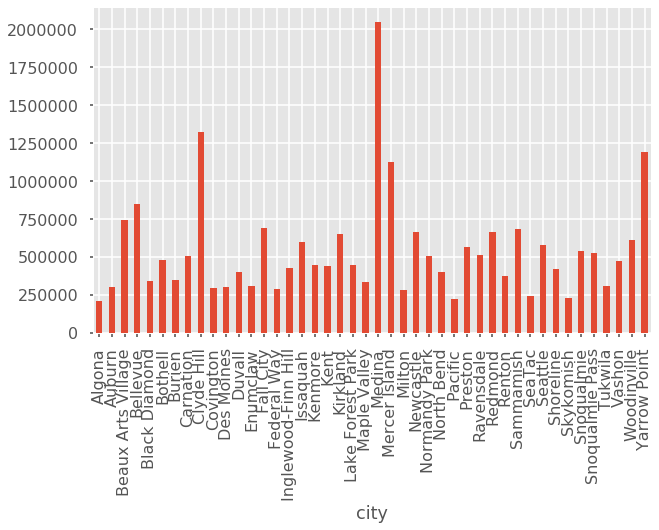

In [81]:
house.groupby('city').mean()['price'].plot(kind='bar')

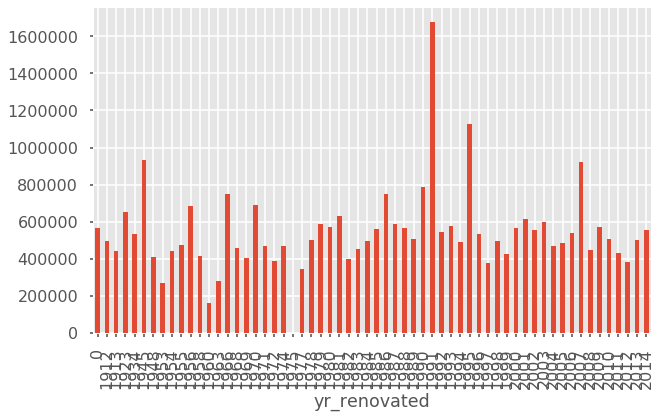

In [82]:
house.groupby('yr_renovated').mean()['price'].plot(kind='bar')

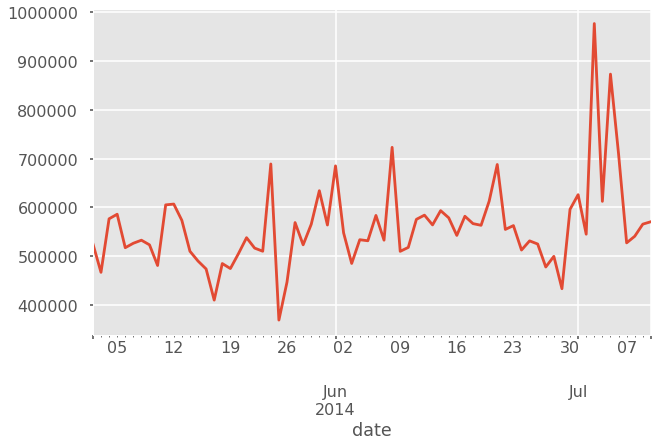

In [83]:
house.groupby('date').mean()['price'].plot(kind='line')

In [84]:
pd.crosstab(index=house['city'], columns=house['bedrooms']).head()

bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
city,,,,,,,,,,
Algona,0,0,1,2,2,0,0,0,0,0
Auburn,0,1,13,85,69,5,2,1,0,0
Beaux Arts Village,0,0,0,1,0,0,0,0,0,0
Bellevue,0,0,7,102,125,46,4,2,0,0
Black Diamond,0,0,1,5,3,0,0,0,0,0


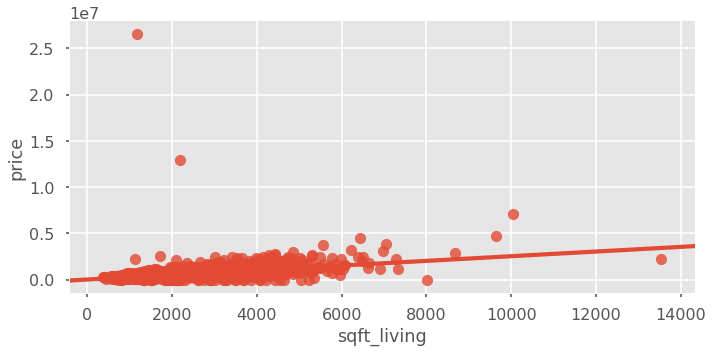

In [85]:
sns.lmplot(x='sqft_living', y='price', data=house, aspect=2, ci=None)

In [86]:
# CATEGORICAL COLUMNS

In [87]:
categorical_cols = ['city', 'bedrooms', 'bathrooms', 'floors', 'condition']

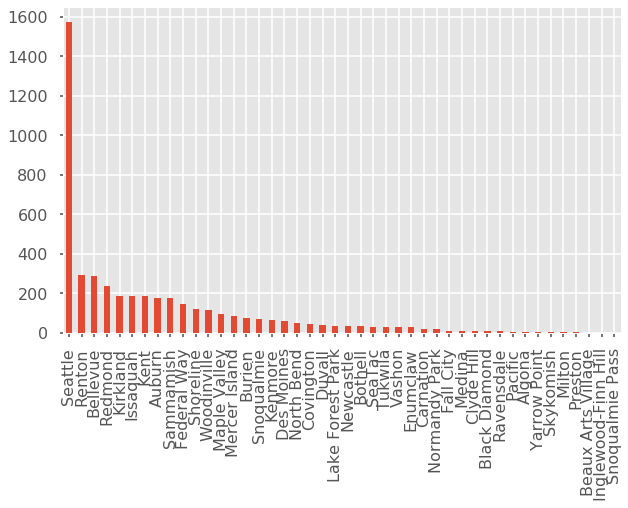

In [88]:
house['city'].value_counts().plot(kind='bar');

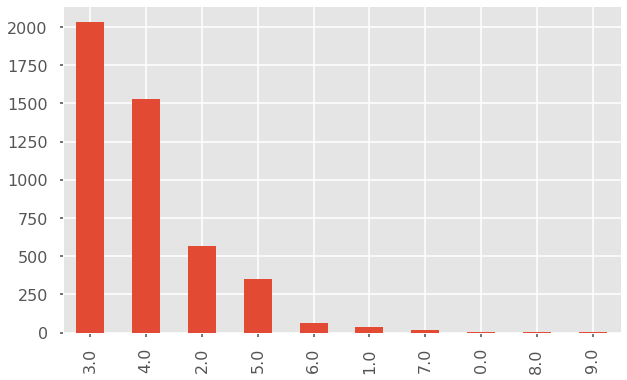

In [89]:
house['bedrooms'].value_counts().plot(kind='bar');

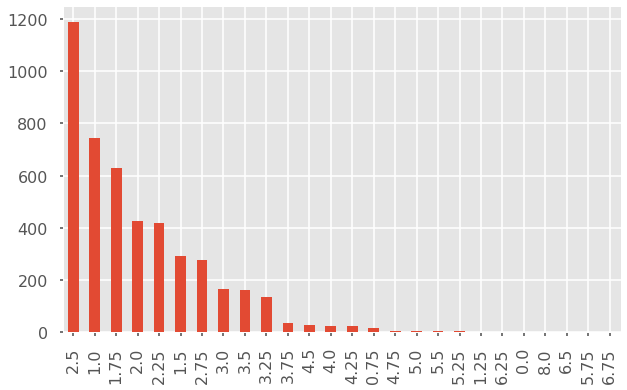

In [90]:
house['bathrooms'].value_counts().plot(kind='bar');

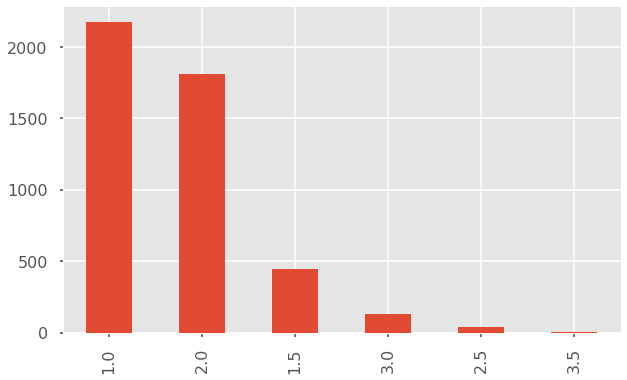

In [91]:
house['floors'].value_counts().plot(kind='bar');

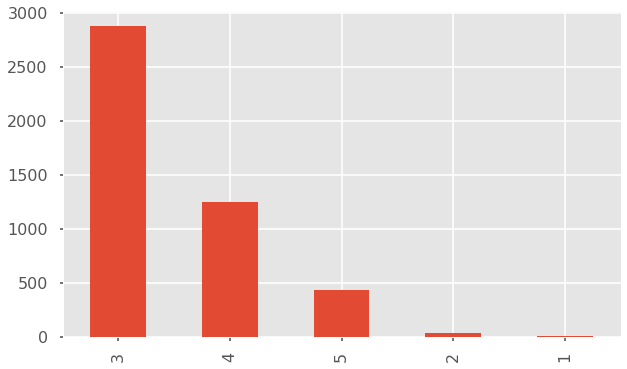

In [92]:
house['condition'].value_counts().plot(kind='bar')

In [93]:
# CONTINUOUS COLUMNS

In [94]:
continuous_cols = ['sqft_living', 'sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
list(enumerate(continuous_cols))

[(0, 'sqft_living'),
 (1, 'sqft_lot'),
 (2, 'sqft_above'),
 (3, 'sqft_basement'),
 (4, 'yr_built'),
 (5, 'yr_renovated')]

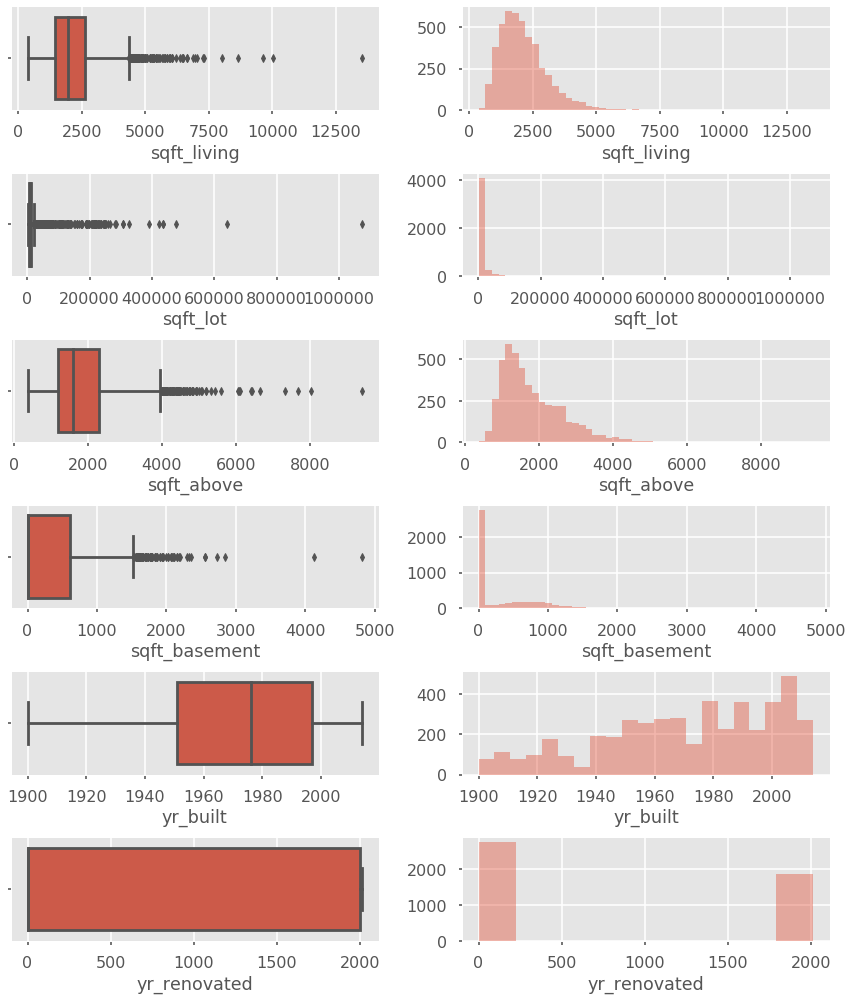

In [95]:
fig, axes = plt.subplots(6, 2, figsize=(12, 14))

for i, col in enumerate(continuous_cols):
    sns.boxplot(house[col], ax=axes[i, 0]);
    sns.distplot(house[col], kde=False, ax=axes[i, 1],);
        
    
fig.tight_layout()

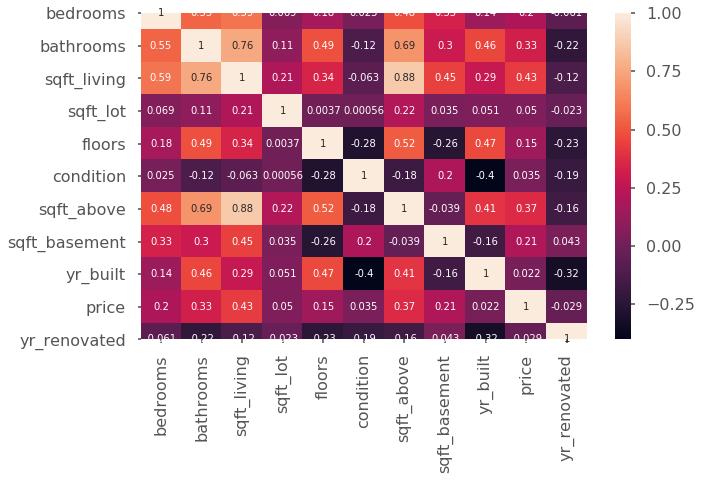

In [96]:
sns.heatmap(house.corr(), annot=True)

In [97]:
# Now we want to build a model to predict the prices of future houses yet to be bought
# We want to use simple models such as; mean,median,max,min, and standard deviation

# Since our target variable is price, we let y=price

In [98]:
y = house['price']
y.sample(5)

3659    359500.0
3219    440000.0
3305    725000.0
4228    680000.0
448     465000.0
Name: price, dtype: float64

* MODEL 1 (MEAN)

In [99]:
y_mean = y.mean()
y_mean

551962.9884732141

In [100]:
mse1 = ((y - y_mean) ** 2).sum() / len(y)
mse1

317840461019.94586

In [101]:
mae1 = abs(y - y_mean).sum() / len(y)
mae1

249123.34707144104

* MODEL 2 (MEDIAN)

In [102]:
y_median = y.median()
y_median

460943.46153850004

In [103]:
mse2 = ((y - y_median) ** 2).sum() / len(y)
mse2

326125015303.365

In [104]:
mae2 = abs(y - y_median).sum() / len(y)
mae2

236963.3090701789

* MODEL 3 (MAX)

In [105]:
y_max = y.max()
y_max

26590000.0

In [106]:
mse3 = ((y - y_max) ** 2).sum() / len(y)
mse3

678297211874658.6

In [107]:
mae3 = abs(y - y_max).sum() / len(y)
mae3

26038037.01152679

* MODEL 4 (STANDARD DEVIATION)

In [108]:
y_std = y.std()
y_std

563834.7025471417

In [109]:
mse4 = ((y - y_std) ** 2).sum() / len(y)
mse4

317981398614.9989

In [110]:
mae4 = abs(y - y_std).sum() / len(y)
mae4

252536.0996121512

* Here, the Mean Squared Errors & Mean Asolute Errors for the 4 models were plotted graphically for comparison.
However, model 3s Mean Squared Error was an outlier and thus was dropped from the plots.

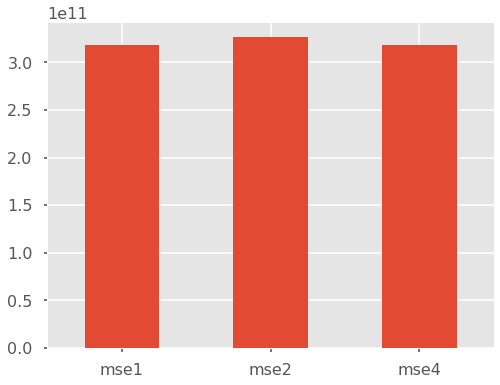

In [111]:
MSEs = {
    'mse1': mse1,
    'mse2': mse2,
    'mse4': mse4
}

pd.Series(MSEs).plot(kind='bar', figsize=(8, 6), rot=0);

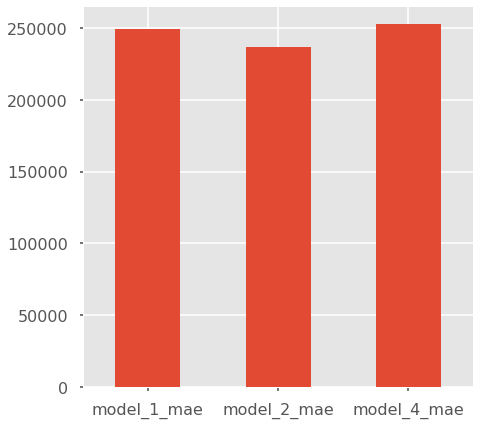

In [119]:
absolute = {
    'model_1_mae': mae1,
    'model_2_mae': mae2,
    'model_4_mae': mae4
}

pd.Series(absolute).plot(kind='bar', figsize=(7, 7), rot=0);

*Here the median prices with respect to all the categorical data was used as a predictor for the prices
This was compared to the original prices 

In [113]:
y2_median = house.groupby('city')['price'].median()
y2_median.head()

city
Algona                230000.0
Auburn                274000.0
Beaux Arts Village    745000.0
Bellevue              721500.0
Black Diamond         255000.0
Name: price, dtype: float64

In [114]:
y2_median = house.groupby('bedrooms')['price'].median()
y2_median

bedrooms
0.0    1195324.0
1.0     262500.0
2.0     369500.0
3.0     424750.0
4.0     568000.0
5.0     580000.0
6.0     665000.0
7.0     711500.0
8.0    1155000.0
9.0     599999.0
Name: price, dtype: float64

In [115]:
y3_median = house.groupby('floors')['price'].median()
y3_median

floors
1.0    390700.0
1.5    535000.0
2.0    554000.0
2.5    831500.0
3.0    479500.0
3.5    829250.0
Name: price, dtype: float64

In [116]:
y4_median = house.groupby('condition')['price'].median()
y4_median

condition
1    310000.0
2    250000.0
3    465000.0
4    440000.0
5    550000.0
Name: price, dtype: float64

In [117]:
pd_bins = pd.cut(house['sqft_living'], range(500, 5000, 1000))

house.pivot_table(index='city', columns=pd_bins, values='price', aggfunc='mean').head(6)

sqft_living,"(500, 1500]","(1500, 2500]","(2500, 3500]","(3500, 4500]"
city,,,,
Algona,165000.000000,235480.000000,NaN,NaN
Auburn,214944.291667,279200.863946,387891.233618,6.279167e+05
Beaux Arts Village,745000.000000,NaN,NaN,NaN
Bellevue,485626.809524,636868.927729,874021.917683,1.367296e+06
Black Diamond,277487.500000,255000.000000,590750.000000,NaN
Bothell,347000.000000,447248.611111,520777.500000,7.200000e+05


In [118]:
pd_above = pd.cut(house['sqft_above'], range(500, 5000, 500))

house.pivot_table(index='city', columns=pd_above, values='price', aggfunc='mean').head(6)

sqft_above,"(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]","(3000, 3500]","(3500, 4000]","(4000, 4500]"
city,,,,,,,,
Algona,100000.00000,230000.000000,196440.000000,255000.000000,NaN,NaN,NaN,NaN
Auburn,173790.00000,232112.096799,257475.297297,340529.208494,390339.628205,4.439214e+05,NaN,738490.0
Beaux Arts Village,NaN,745000.000000,NaN,NaN,NaN,NaN,NaN,NaN
Bellevue,427109.52381,572363.314394,719554.683333,905494.800000,963583.555556,1.194936e+06,1436902.625,1377564.6
Black Diamond,398000.00000,241737.500000,510000.000000,0.000000,NaN,5.907500e+05,NaN,NaN
Bothell,NaN,449722.222222,433588.636364,543400.000000,514801.785714,7.499950e+05,NaN,NaN
